In [5]:
# Install gdown if not already installed
##!pip install gdown

# Import required libraries
import gdown
import pandas as pd

# Define file ID and URL
file_id = '1UlWRYU0UglE2ex3iFse0J6eCLEU8g98P'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'house_price.csv'

# Download the file
gdown.download(url, output, quiet=False)

# Read the CSV file
df = pd.read_csv('house_price.csv')

# Display the first few rows of the dataframe
df.head()


Downloading...
From: https://drive.google.com/uc?id=1UlWRYU0UglE2ex3iFse0J6eCLEU8g98P
To: C:\Users\pc\house_price.csv
100%|██████████| 553k/553k [00:01<00:00, 509kB/s]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
df.describe()  #(summary of the numerical columns.)

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [7]:
df.isnull().sum() #(Check for any missing values using)

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [8]:
df.dtypes #(Data Types)

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [9]:
df.nunique()

location           241
size                31
total_sqft        1972
bath                19
price             1952
bhk                 19
price_per_sqft    4951
dtype: int64

# ----------------------------------------------------------------------------------

In [27]:
import pandas as pd

# Load the dataset
df = pd.read_csv('house_price.csv')

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate mean and standard deviation for each numerical column
for column in numerical_columns:
    mean = df[column].mean()
    std = df[column].std()
    print(f'Mean of {column}: {mean}')
    print(f'Standard Deviation of {column}: {std}\n')


Mean of total_sqft: 1555.3027829545454
Standard Deviation of total_sqft: 1237.3234454015123

Mean of bath: 2.6911363636363634
Standard Deviation of bath: 1.3389150868179767

Mean of price: 112.27617765151514
Standard Deviation of price: 149.17599517809657

Mean of bhk: 2.8008333333333333
Standard Deviation of bhk: 1.2928434212725608

Mean of price_per_sqft: 7920.336742424242
Standard Deviation of price_per_sqft: 106727.16032810845



In [29]:
df_original=df.copy()

In [87]:
# Mean and Standard Deviation
mean_price_per_sqft = df['price_per_sqft'].mean()
std_price_per_sqft = df['price_per_sqft'].std()

# Define thresholds
lower_bound = mean_price_per_sqft - 3 * std_price_per_sqft
upper_bound = mean_price_per_sqft + 3 * std_price_per_sqft

# Filter out outliers
df_filtered_mean_std = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

In [16]:
# Summary statistics for original data
original_stats = df['price_per_sqft'].describe()

# Summary statistics for filtered data
filtered_stats = df_filtered['price_per_sqft'].describe()

print("Original Data Summary:\n", original_stats)
print("Filtered Data Summary:\n", filtered_stats)


Original Data Summary:
 count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64
Filtered Data Summary:
 count     13195.000000
mean       6713.708602
std        4876.727718
min         267.000000
25%        4266.500000
50%        5434.000000
75%        7313.000000
max      200000.000000
Name: price_per_sqft, dtype: float64


### b) Percentile Method

In [39]:
# Define thresholds using percentiles
lower_percentile = df['price_per_sqft'].quantile(0.01)
upper_percentile = df['price_per_sqft'].quantile(0.99)

# Filter out outliers
df_filtered_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]


In [41]:
# Summary statistics for original data
original_stats = df['price_per_sqft'].describe()

# Summary statistics for filtered data (percentile method)
filtered_percentile_stats = df_filtered_percentile['price_per_sqft'].describe()

print("Original Data Summary:\n", original_stats)
print("\nFiltered Data Summary (Percentile Method):\n", filtered_percentile_stats)


Original Data Summary:
 count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Filtered Data Summary (Percentile Method):
 count    12941.000000
mean      6494.895139
std       3502.061133
min       2549.000000
25%       4285.000000
50%       5434.000000
75%       7252.000000
max      23674.000000
Name: price_per_sqft, dtype: float64


### --------------------------------------------------------------------------------------------------

### c) IQR (Interquartile Range Method)

In [45]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]


In [47]:
# Summary statistics for original data
original_stats = df['price_per_sqft'].describe()

# Summary statistics for filtered data (IQR method)
filtered_iqr_stats = df_filtered_iqr['price_per_sqft'].describe()

print("Original Data Summary:\n", original_stats)
print("\nFiltered Data Summary (IQR Method):\n", filtered_iqr_stats)


Original Data Summary:
 count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Filtered Data Summary (IQR Method):
 count    11935.000000
mean      5575.925513
std       1957.779783
min        267.000000
25%       4166.000000
50%       5188.000000
75%       6603.000000
max      11875.000000
Name: price_per_sqft, dtype: float64


### --------------------------------------------------------------------------------------------------------

### d) Z Score Method

In [51]:
from scipy import stats

# Calculate Z-scores
df['z_score'] = stats.zscore(df['price_per_sqft'])

# Define thresholds
df_filtered_z_score = df[(df['z_score'] >= -3) & (df['z_score'] <= 3)]


In [55]:
# Summary statistics for original data
original_stats = df['price_per_sqft'].describe()

# Summary statistics for filtered data (Z score method)
filtered_z_score_stats = df_filtered_z_score['price_per_sqft'].describe()

print("Original Data Summary:\n", original_stats)
print("\nFiltered Data Summary (Z Score Method):\n", filtered_z_score_stats)


Original Data Summary:
 count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Filtered Data Summary (Z Score Method):
 count     13195.000000
mean       6713.708602
std        4876.727718
min         267.000000
25%        4266.500000
50%        5434.000000
75%        7313.000000
max      200000.000000
Name: price_per_sqft, dtype: float64


### ------------------------------------------------------------------------------------------------------

### Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? (Score:1)


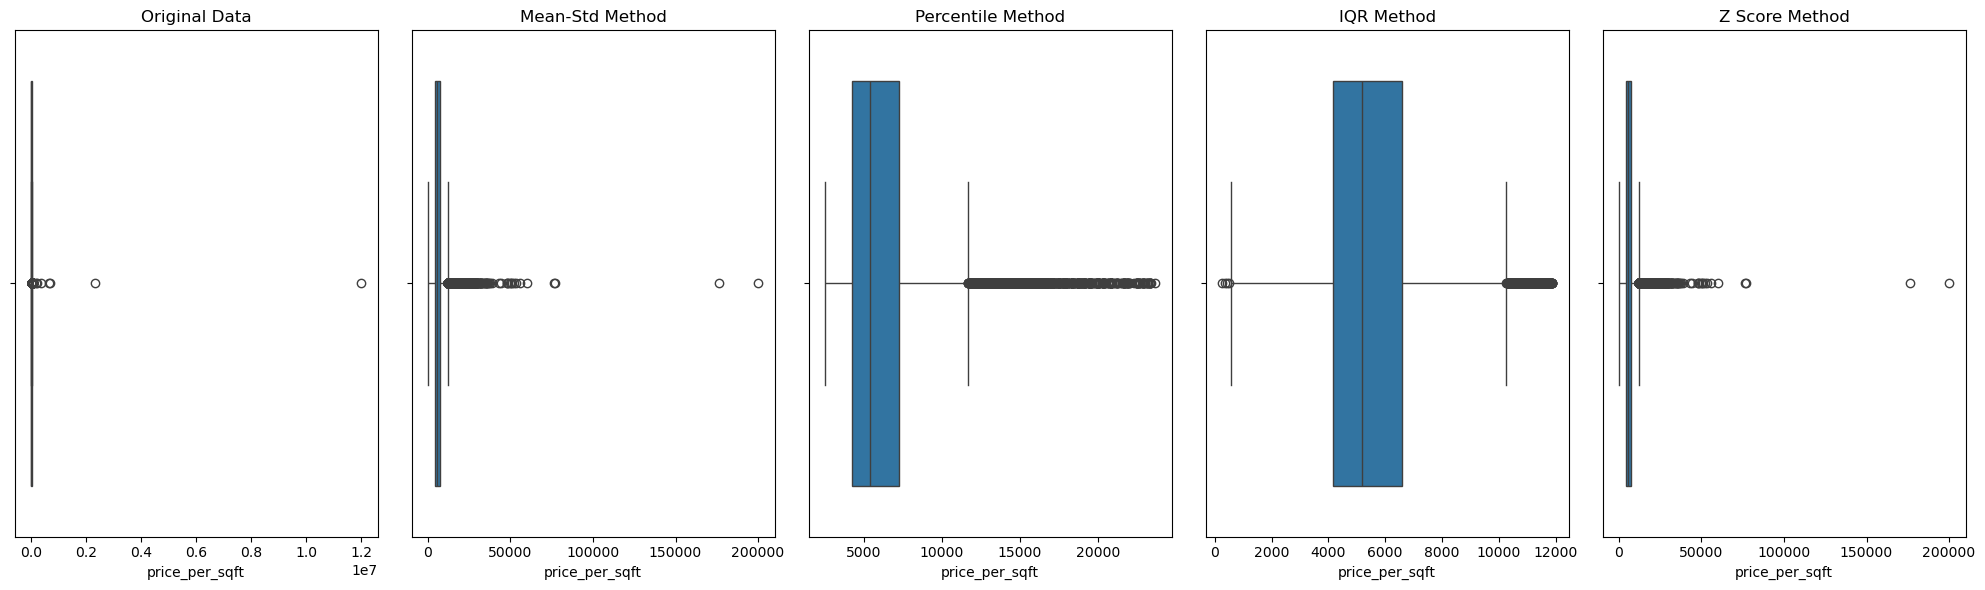

In [91]:
plt.figure(figsize=(20, 6))

# Original Data
plt.subplot(1, 5, 1)
sns.boxplot(x=df['price_per_sqft'])
plt.title('Original Data')

# Mean-Std Method
plt.subplot(1, 5, 2)
sns.boxplot(x=df_filtered_mean_std['price_per_sqft'])
plt.title('Mean-Std Method')

# Percentile Method
plt.subplot(1, 5, 3)
sns.boxplot(x=df_filtered_percentile['price_per_sqft'])
plt.title('Percentile Method')

# IQR Method
plt.subplot(1, 5, 4)
sns.boxplot(x=df_filtered_iqr['price_per_sqft'])
plt.title('IQR Method')

# Z Score Method
plt.subplot(1, 5, 5)
sns.boxplot(x=df_filtered_z_score['price_per_sqft'])
plt.title('Z Score Method')

plt.tight_layout()
plt.show()


### IQR Method shows fewer outliers and a balanced central tendency, it might be the most effective.

### ---------------------------------------------------------------------------------------------------------------------

### Q4. Draw Histplot to Check Normality and Perform Transformations

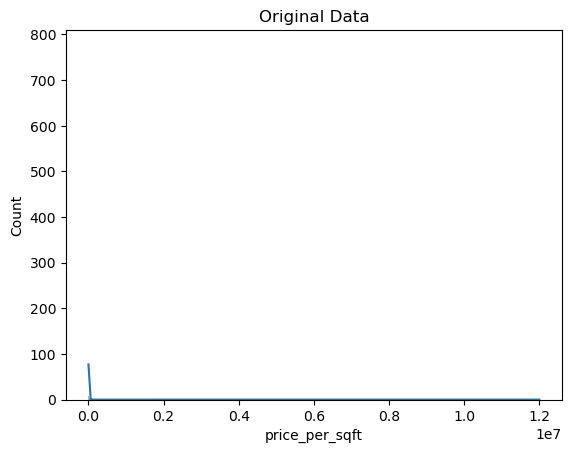

Original Skewness: 108.28105529705168
Original Kurtosis: 12095.21502832288


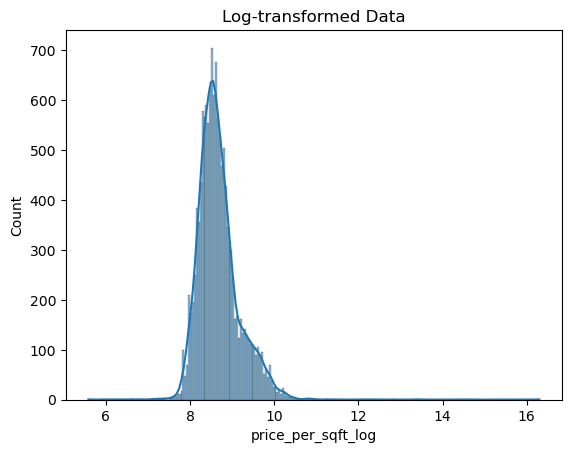

Log-transformed Skewness: 1.3998626551353
Log-transformed Kurtosis: 9.203576429862675


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Histplot for original data
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Original Data')
plt.show()

# Check skewness and kurtosis
original_skewness = df['price_per_sqft'].skew()
original_kurtosis = df['price_per_sqft'].kurtosis()

print(f"Original Skewness: {original_skewness}")
print(f"Original Kurtosis: {original_kurtosis}")

# Perform log transformation if needed
df['price_per_sqft_log'] = np.log(df['price_per_sqft'])

# Histplot for log-transformed data
sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title('Log-transformed Data')
plt.show()

# Check skewness and kurtosis after transformation
log_skewness = df['price_per_sqft_log'].skew()
log_kurtosis = df['price_per_sqft_log'].kurtosis()

print(f"Log-transformed Skewness: {log_skewness}")
print(f"Log-transformed Kurtosis: {log_kurtosis}")


In [67]:
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
# Apply Box-Cox transformation to the log-transformed data
df['price_per_sqft_boxcox'], fitted_lambda = boxcox(df['price_per_sqft_log'] + 1)  # Adding 1 to avoid log(0)

# Check the skewness and kurtosis after the Box-Cox transformation
boxcox_skewness = df['price_per_sqft_boxcox'].skew()
boxcox_kurtosis = df['price_per_sqft_boxcox'].kurtosis()

print(f"Box-Cox Skewness: {boxcox_skewness}")
print(f"Box-Cox Kurtosis: {boxcox_kurtosis}")


Box-Cox Skewness: -0.1892207486777333
Box-Cox Kurtosis: 6.694203051144381


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
# Apply square root transformation to the log-transformed data
df['price_per_sqft_sqrt'] = np.sqrt(df['price_per_sqft_log'])

# Check the skewness and kurtosis after the Square Root transformation
sqrt_skewness = df['price_per_sqft_sqrt'].skew()
sqrt_kurtosis = df['price_per_sqft_sqrt'].kurtosis()

print(f"Square Root Skewness: {sqrt_skewness}")
print(f"Square Root Kurtosis: {sqrt_kurtosis}")


Square Root Skewness: 1.1005600215031184
Square Root Kurtosis: 5.996444618940268


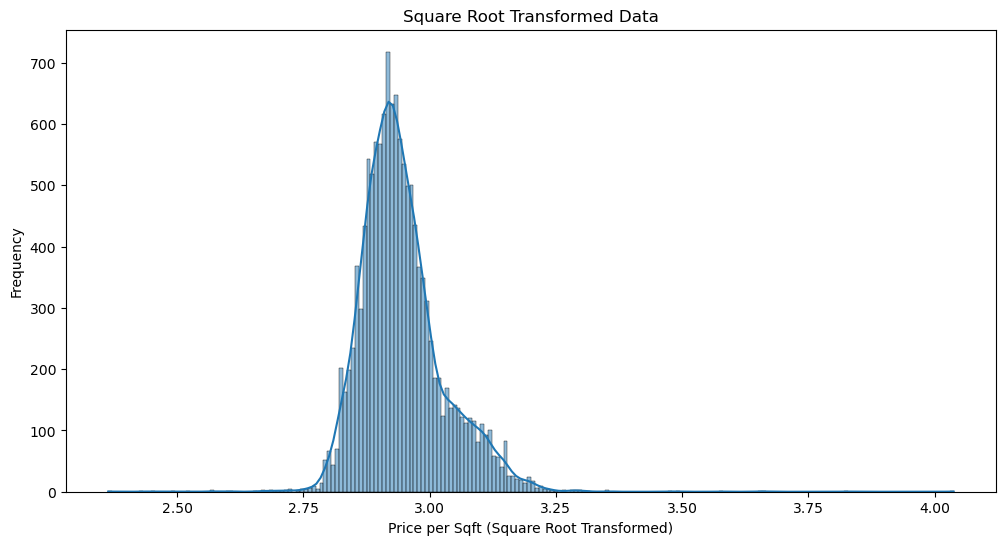

In [98]:
# Assuming df contains the transformed data
plt.figure(figsize=(12, 6))
sns.histplot(df['price_per_sqft_sqrt'], kde=True)
plt.title('Square Root Transformed Data')
plt.xlabel('Price per Sqft (Square Root Transformed)')
plt.ylabel('Frequency')
plt.show()


### --------------------------------------------------------------------------------------------------------

### Q5. Check the correlation between all the numerical columns and plot heatmap. (Score:1)


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('house_price.csv')


In [116]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])


In [120]:
# Calculate the correlation matrix
# Calculate the correlation matrix for numerical columns only
correlation_matrix = numerical_df.corr()



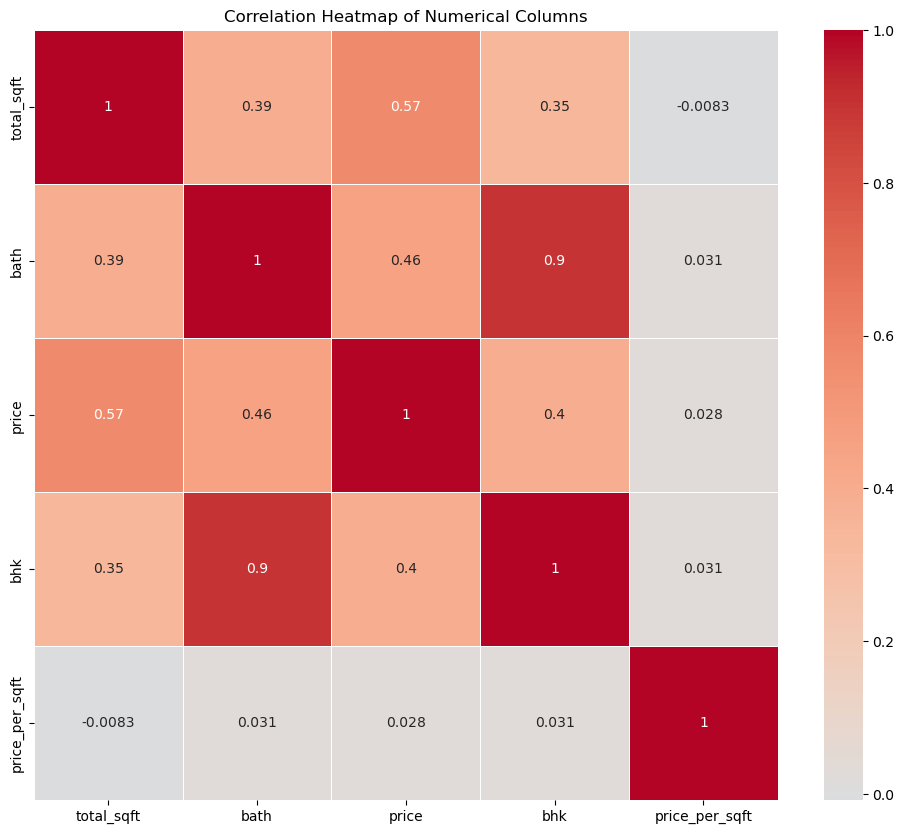

In [122]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


### ----------------------------------------------------------------------------------

### Q6. Draw Scatter plot between the variables to check the correlation between them. (Score:1)



### 1)Scatter Plot: Total Square Feet vs. Price per Square Foot

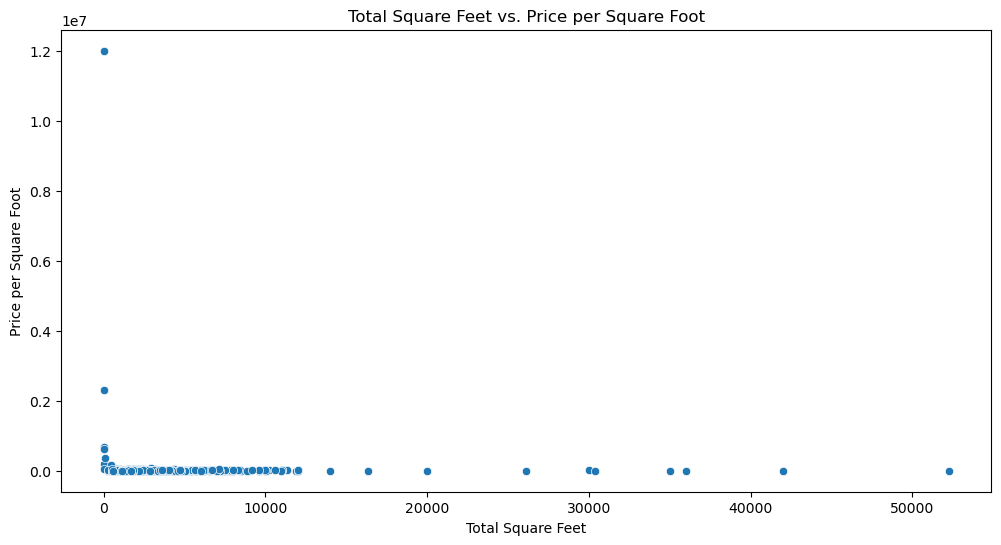

In [133]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='total_sqft', y='price_per_sqft')
plt.title('Total Square Feet vs. Price per Square Foot')
plt.xlabel('Total Square Feet')
plt.ylabel('Price per Square Foot')
plt.show()


In [128]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

### 2)Scatter Plot: Total Square Feet vs. Price

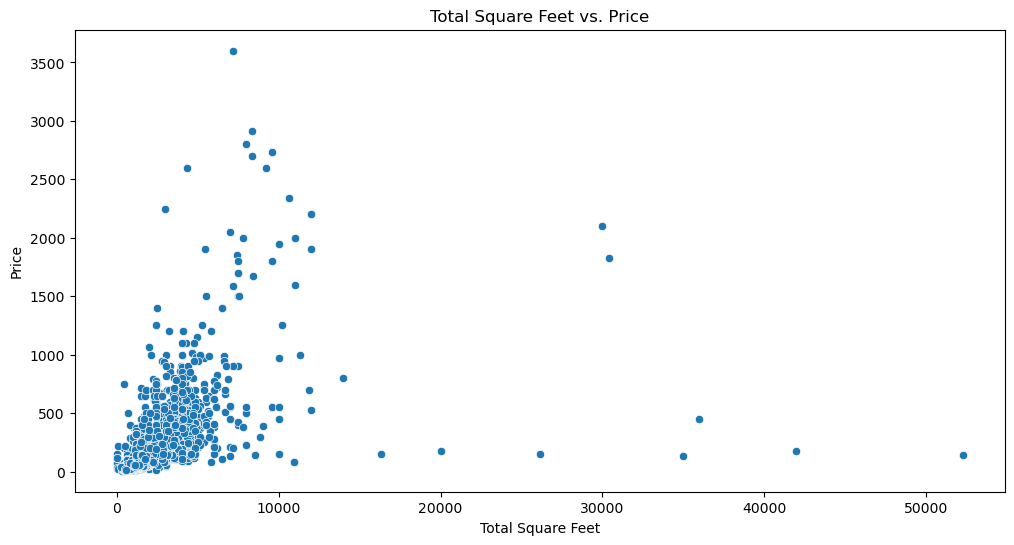

In [140]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='total_sqft', y='price')
plt.title('Total Square Feet vs. Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()
